In [1]:
from LWP import LWP

import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split

### f1 Model - D1

Using D1, train a model f1 using an LwP classifier (you are free to use any feature representation or kernels, and are also allowed to use your own improved variant of the basic LwP classifier if it helps solve the task better),

In [2]:
data = np.load("Augmented_Data/part_one_dataset/train_data/1_train_data.npz")
x = data['data']
y = data['targets']

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,shuffle=True,random_state=1464345)

### TSNE

In [4]:
tsne = TSNE(n_components=2, perplexity=20, learning_rate=200)
xa = tsne.fit_transform(x)

/var/folders/86/bhjf1dqn6v5b_t0q0hft1sdr0000gn/T/ipykernel_5364/1126057947.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


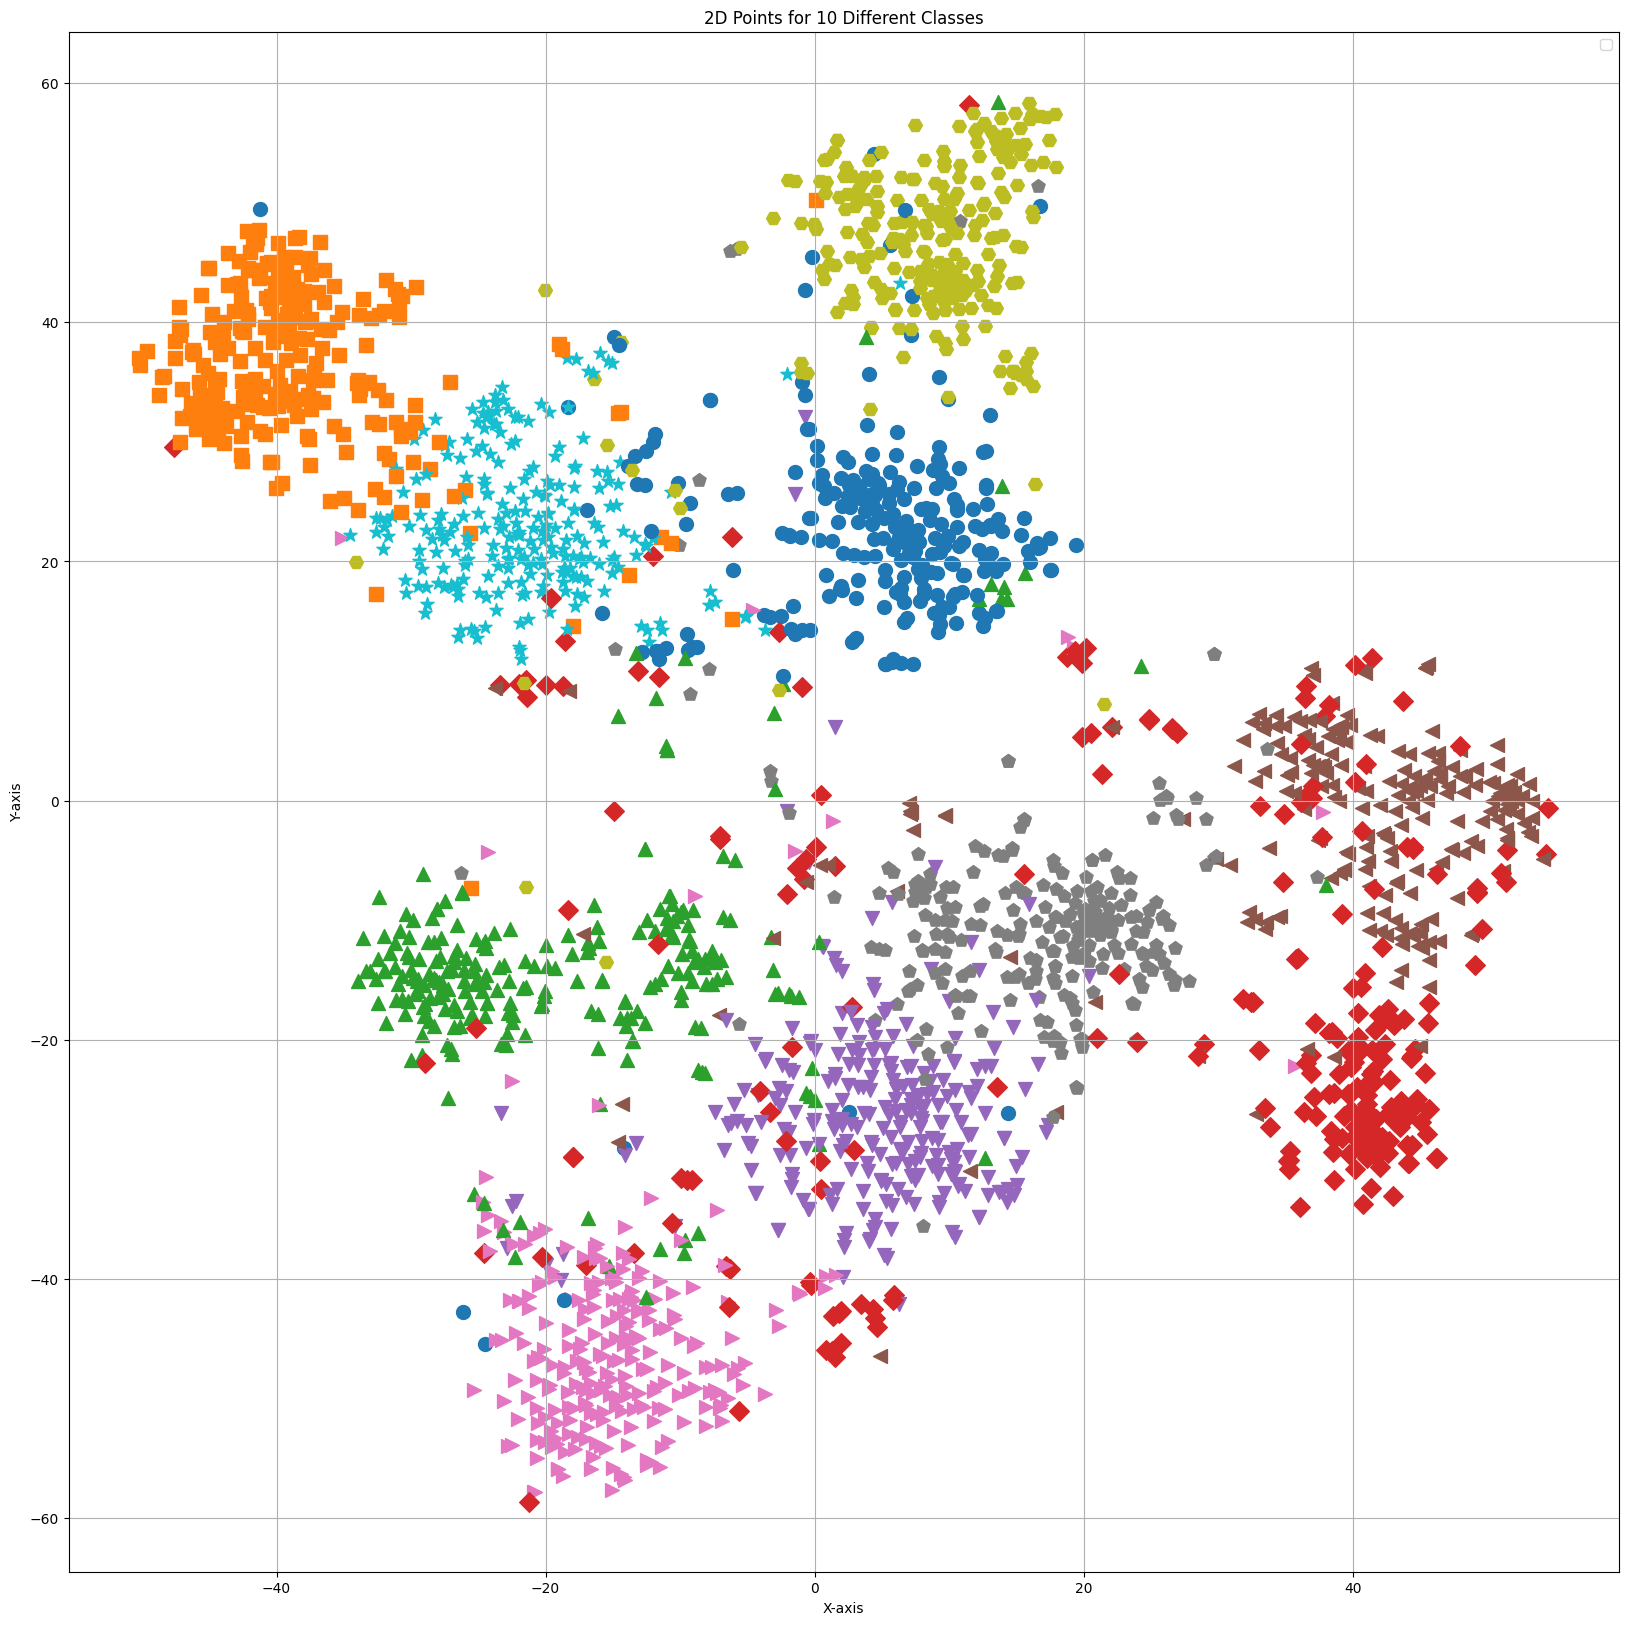

In [5]:
# Number of classes
num_classes = 10

# Generating random data for each class
points_per_class = 20  # Number of points per class
colors = plt.cm.tab10.colors  # Use a colormap for 10 distinct colors
markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', 'H', '*']  # 10 different marker shapes

plt.figure(figsize=(20,20))

for i in range(len(xa[:])):

    # Plot with a unique color and marker for each class
    plt.scatter(xa[i][0], xa[i][1], color=colors[y[i]], marker=markers[y[i]], s=100)

plt.title('2D Points for 10 Different Classes')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.savefig('tsne_D1.png')
plt.show()

In [6]:
f1 = LWP(numClasses=10, veclen=len(x_train[0]))

In [7]:
f1.fit(x_train, y_train)

In [8]:
f1.evaluate(x_train,y_train)

0.896

In [9]:
f1.evaluate(x_test,y_test)

0.882

In [10]:
D1_eval = np.load("Augmented_Data/part_one_dataset/eval_data/1_eval_data.npz")
D1_eval_x = D1_eval['data']
D1_eval_y = D1_eval['targets']

In [11]:
f1.evaluate(D1_eval_x, D1_eval_y)

0.8732

## apply f1 to predict the labels of D2

apply f1 to predict the labels of D2 (note that its true labels are not known), use D2 along with its predicted labels to update f1 to f2. How you use the predicted labels of D2 to update f1 to f2 is up to you but, when doing this, you must not use the dataset D1 (note that you are using f1 anyway which was learned using D1).

In [12]:
D2_train = np.load("Augmented_Data/part_one_dataset/train_data/2_train_data.npz")
D2_train_x = D2_train['data']

In [13]:
preds_prob = f1.predict(D2_train_x)
preds = np.argmax(preds_prob, axis=1)
print(preds)
print(preds_prob.shape)
print(preds.shape)

[6 7 9 ... 8 3 0]
(2500, 10)
(2500,)


In [14]:
def keep(x, pred, upper_bound=0.7):
    class_pred = np.argmax(pred, axis=1)
    keep_x = []
    keep_y = []
    for i, c in enumerate(class_pred):
        if pred[i][c] > upper_bound:
            keep_x.append(x[i])
            keep_y.append(c)

    return np.array(keep_x), np.array(keep_y)

In [15]:
keep_x2, keep_y2 = keep(D2_train_x, preds_prob)

In [16]:
print(keep_x2.shape)
print(keep_y2.shape)

(2360, 768)
(2360,)


In [17]:
f2 = f1.copy()
f2.fit(keep_x2, keep_y2)

In [18]:
D2_eval = np.load("Augmented_Data/part_one_dataset/eval_data/2_eval_data.npz")
D2_eval_x = D2_eval['data']
D2_eval_y = D2_eval['targets']

In [19]:
preds_prob = f2.predict(D2_eval_x)
preds = np.argmax(preds_prob, axis=1)
print(preds)
print(preds_prob.shape)
print(preds.shape)

[3 3 0 ... 9 1 5]
(2500, 10)
(2500,)


In [20]:
f2.evaluate(D2_eval_x, D2_eval_y)

0.8792

In [21]:
f2.evaluate(D1_eval_x, D1_eval_y)

0.8648

# 

Now use f2 to predict the labels of D3 and update f2 to f3 in the same way as you updated f1 to f2. You have to keep doing this for the first 10 datasets D1;D2; : : : ;D10 and learn 10 models f1; f2; : : : ; f10. Note that the size of each model (in terms of the number of parameters) should be the same. Once you have learned them, apply each model fi 2 ff1; f2; : : : ; f10g on the ith heldout dataset ^Di as well as the previous heldout datasets ^Dj ; j < i (e.g., apply f3 on ^D3 and also on ^D1; ^D2), and report the accuracies of each of these models on each of these heldout datasets. In your report, show the various accuracies in form of a matrix (with 10 rows representing the 10 models and 10 columns representing the 10 held-out datasets).

In [22]:
# Placeholder for accuracy matrix (10x10)
accuracy_matrix = np.zeros((10, 10))

# Initial model f1 is trained on D1 (labeled dataset)
f1 = LWP(numClasses=10, veclen=len(x_train[0]))
f1.fit(x_train, y_train)

# Evaluate f1 on D̂_1 (the evaluation dataset for D1)
D1_eval = np.load("Augmented_Data/part_one_dataset/eval_data/1_eval_data.npz")
D1_eval_x = D1_eval['data']
D1_eval_y = D1_eval['targets']
accuracy_matrix[0, 0] = f1.evaluate(D1_eval_x, D1_eval_y)

# Update current model
current_model = f1

# Loop through D2 to D10
for i in range(2, 11):  # Start from D2
    print(f"Processing dataset D{i}")
    
    # Load current train and eval datasets
    train_data = np.load(f"Augmented_Data/part_one_dataset/train_data/{i}_train_data.npz")
    train_x = train_data['data']
    
    eval_data = np.load(f"Augmented_Data/part_one_dataset/eval_data/{i}_eval_data.npz")
    eval_x, eval_y = eval_data['data'], eval_data['targets']
    
    # Predict labels for the current dataset
    preds_prob = current_model.predict(train_x)
    keep_x, keep_y = keep(train_x, preds_prob, upper_bound=0.7)
    
    # Train the next model
    next_model = current_model.copy()
    next_model.fit(keep_x, keep_y)
    
    # Evaluate the updated model on held-out datasets (D̂_1 to D̂_i)
    for j in range(1, i + 1):  # Evaluate on datasets D̂_1 to D̂_i
        eval_data_j = np.load(f"Augmented_Data/part_one_dataset/eval_data/{j}_eval_data.npz")
        eval_x_j, eval_y_j = eval_data_j['data'], eval_data_j['targets']
        accuracy = next_model.evaluate(eval_x_j, eval_y_j)
        accuracy_matrix[i - 1, j - 1] = accuracy
        print(f"Accuracy of f{i} on D̂{j}: {accuracy}")
    
    # Update the current model
    current_model = next_model


# Save the final model f10
joblib.dump(current_model, "f10_model.pkl")
print("Model f10 saved as f10_model.pkl")

# Save the accuracy matrix
np.save("accuracy_matrix_task1.npy", accuracy_matrix)

# Display the accuracy matrix
print("Final Accuracy Matrix:")
print(accuracy_matrix)



Processing dataset D2
Accuracy of f2 on D̂1: 0.8648
Accuracy of f2 on D̂2: 0.8792
Processing dataset D3
Accuracy of f3 on D̂1: 0.8636
Accuracy of f3 on D̂2: 0.878
Accuracy of f3 on D̂3: 0.8704
Processing dataset D4
Accuracy of f4 on D̂1: 0.8604
Accuracy of f4 on D̂2: 0.8772
Accuracy of f4 on D̂3: 0.8684
Accuracy of f4 on D̂4: 0.872
Processing dataset D5
Accuracy of f5 on D̂1: 0.8596
Accuracy of f5 on D̂2: 0.876
Accuracy of f5 on D̂3: 0.8688
Accuracy of f5 on D̂4: 0.8728
Accuracy of f5 on D̂5: 0.8712
Processing dataset D6
Accuracy of f6 on D̂1: 0.858
Accuracy of f6 on D̂2: 0.8764
Accuracy of f6 on D̂3: 0.8684
Accuracy of f6 on D̂4: 0.8728
Accuracy of f6 on D̂5: 0.87
Accuracy of f6 on D̂6: 0.8624
Processing dataset D7
Accuracy of f7 on D̂1: 0.8564
Accuracy of f7 on D̂2: 0.8756
Accuracy of f7 on D̂3: 0.8688
Accuracy of f7 on D̂4: 0.872
Accuracy of f7 on D̂5: 0.8716
Accuracy of f7 on D̂6: 0.8628
Accuracy of f7 on D̂7: 0.86
Processing dataset D8
Accuracy of f8 on D̂1: 0.8572
Accuracy of f8 

In [23]:
# Create a DataFrame for a nicer format
accuracy_matrix_df = pd.DataFrame(
    accuracy_matrix,
    columns=[f"D̂{j+1}" for j in range(accuracy_matrix.shape[1])],  # Held-out datasets
    index=[f"f{i+1}" for i in range(accuracy_matrix.shape[0])]  # Models from f11 to f20
)
# Replace 0.0000 with an empty string for better visualization
accuracy_matrix_df = accuracy_matrix_df.replace(0.0000, "")


In [24]:
accuracy_matrix_df

,D̂1,D̂2,D̂3,D̂4,D̂5,D̂6,D̂7,D̂8,D̂9,D̂10
f1,0.8732,,,,,,,,,
f2,0.8648,0.8792,,,,,,,,
f3,0.8636,0.878,0.8704,,,,,,,
f4,0.8604,0.8772,0.8684,0.872,,,,,,
f5,0.8596,0.876,0.8688,0.8728,0.8712,,,,,
f6,0.8580,0.8764,0.8684,0.8728,0.87,0.8624,,,,
f7,0.8564,0.8756,0.8688,0.872,0.8716,0.8628,0.86,,,
f8,0.8572,0.8748,0.8684,0.8692,0.8704,0.8616,0.8584,0.8692,,
f9,0.8568,0.8744,0.8684,0.8704,0.8712,0.8608,0.8584,0.8684,0.8692,
f10,0.8560,0.8752,0.8688,0.8688,0.8708,0.8596,0.8584,0.8684,0.8704,0.8764
